# AUTHOR - KORRA SAGAR BABU
# DATA SCIENCE AND BUSINESS ANALYTICS INTERN (TASK-1)
## **PREDICTION USING SUPERVISED ML**
**task 1 : To predict the percentage of a student based on no.of study hours.**



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


**Load** **datasets**


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# To see all first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory data analysis**

In [5]:
# To generate desriptive statistics of given data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# noticing the kind of datatype using in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.isnull().sum() # this signifies that no pull values is present in our dataset

Hours     0
Scores    0
dtype: int64

**Data** **Visualisation**

<Figure size 432x288 with 0 Axes>

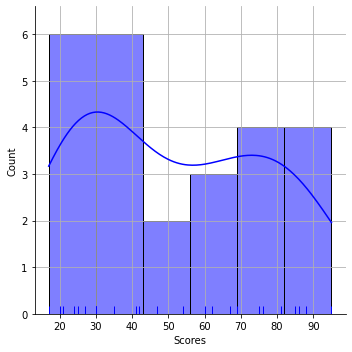

In [9]:
plt.figure(figsize =(6,4))
sns.displot(df.Scores,color='b',kde =True,rug =True)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


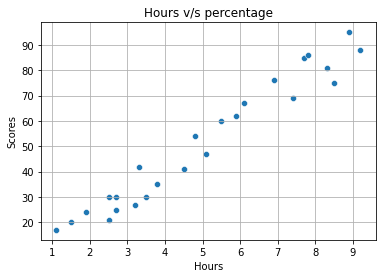

In [10]:
plt.figure(figsize=(6,4))
plt.title("Hours v/s percentage")
sns.scatterplot(df['Hours'],df.Scores)
plt.grid()

**Preparing the** **data**

In [11]:
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X=df.iloc[:,:-1].values

In [12]:
y=df.iloc[:,1].values

**Train test** **split**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size =0.2,
                                               random_state =60)

**Training the** **algorithm**

In [14]:
# We have split our data into training and testing sets, and now is finally the time to train our algorithm using simple linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete..")

Training Complete..


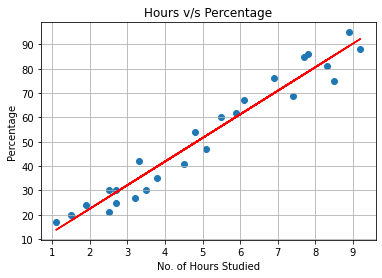

In [15]:
# Now plot the best fitted regression line

plt.figure(figsize=(6,4))
line = regressor.coef_*X + regressor.intercept_
plt.plot(X, line,'r')
plt.scatter(X,y)
plt.title("Hours v/s Percentage")
plt.xlabel("No. of Hours Studied")
plt.ylabel("Percentage")
plt.grid()

**Predicting the** **model**

In [16]:
y_pred = regressor.predict(x_test)
print(y_pred)

[13.76560485 29.27126825 60.28259506 27.33306033 29.27126825]


In [17]:
print(y_test)

[17 30 62 21 25]


In [18]:
print(x_test)

[[1.1]
 [2.7]
 [5.9]
 [2.5]
 [2.7]]


In [19]:
# Comparing the actual and predicted one..
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


In [20]:
hours = 9.25
pred = regressor.predict([[hours]])
print("For given no. of hours of studies...he/she gets a {} score in exam".format(pred[0]))

For given no. of hours of studies...he/she gets a 92.74757780643363 score in exam


**Evaluating the** **model**

In [21]:
# final step is to evaluate the performance of our model...

from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_pred,y_test))

Mean Absolute Error : 3.256972083783501
Mean Squared Error : 14.458645457297166
